In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta del dataset externo
ruta_datos = "/home/samuel/Documentos/datos/Watch_gyroscope.csv"

# Cargar el dataset
df = pd.read_csv(ruta_datos)
df.head()


,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638743,27920678496000,-0.162187,-0.022104,0.059655,a,gear,gear_1,stand
1,1,1424696638743,27920681926000,-0.183225,-0.061785,0.012517,a,gear,gear_1,stand
2,2,1424696638743,27920692031000,-0.180829,-0.108657,-0.036485,a,gear,gear_1,stand
3,3,1424696638743,27920701997000,-0.147805,-0.157925,-0.098537,a,gear,gear_1,stand
4,7,1424696638744,27920743068000,0.182160,-0.323574,-0.277235,a,gear,gear_1,stand


In [2]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nResumen estadístico:")
df.describe()


Dimensiones del dataset: (3205431, 10)

Tipos de datos:
Index              int64
Arrival_Time       int64
Creation_Time      int64
x                float64
y                float64
z                float64
User              object
Model             object
Device            object
gt                object
dtype: object

Valores nulos por columna:
Index                 0
Arrival_Time          0
Creation_Time         0
x                     0
y                     0
z                     0
User                  0
Model                 0
Device                0
gt               470429
dtype: int64

Resumen estadístico:


,Index,Arrival_Time,Creation_Time,x,y,z
count,3.205431e+06,3.205431e+06,3.205431e+06,3.205431e+06,3.205431e+06,3.205431e+06
mean,1.687520e+05,1.424753e+12,2.252645e+14,1.464436e-02,3.442195e-03,-1.595263e-02
std,1.339801e+05,4.243876e+07,9.723032e+13,1.039200e+00,5.793003e-01,1.007601e+00
min,0.000000e+00,1.424687e+12,2.026017e+11,-2.407417e+01,-9.186035e+00,-1.577106e+01
25%,3.621400e+04,1.424698e+12,2.058292e+14,-3.163910e-01,-1.605886e-01,-2.989349e-01
50%,1.496940e+05,1.424781e+12,2.907704e+14,2.700806e-03,1.098633e-03,-2.746582e-03
75%,2.832530e+05,1.424786e+12,2.963813e+14,3.440704e-01,1.797028e-01,2.589417e-01
max,4.594450e+05,1.424789e+12,3.006436e+14,3.180321e+01,9.764465e+00,8.764343e+00


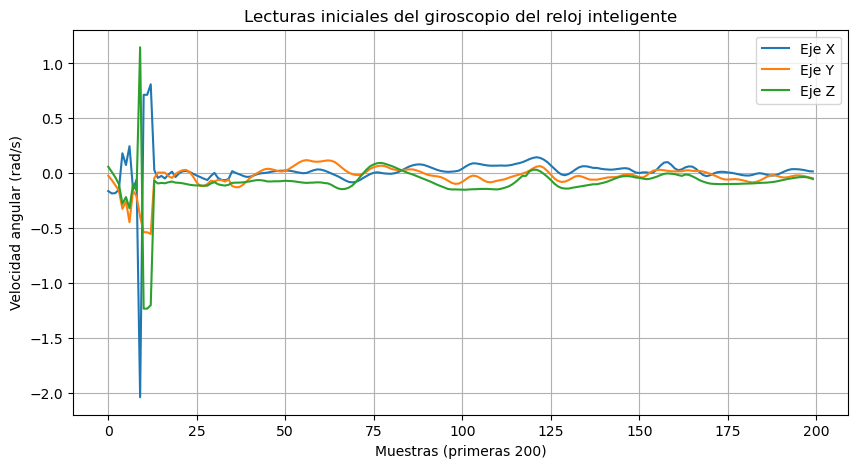

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df['x'][:200], label='Eje X')
plt.plot(df['y'][:200], label='Eje Y')
plt.plot(df['z'][:200], label='Eje Z')
plt.title("Lecturas iniciales del giroscopio del reloj inteligente")
plt.xlabel("Muestras (primeras 200)")
plt.ylabel("Velocidad angular (rad/s)")
plt.legend()
plt.grid(True)
plt.show()


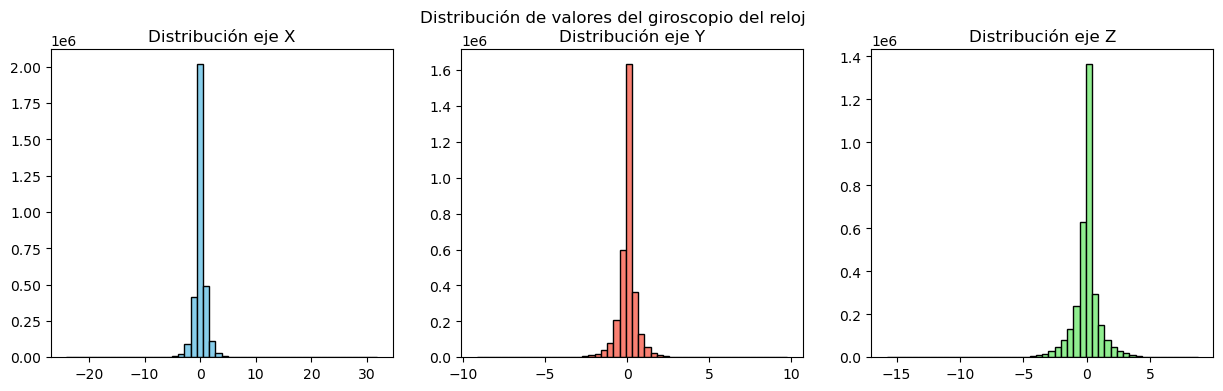

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df['x'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución eje X')

axes[1].hist(df['y'], bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Distribución eje Y')

axes[2].hist(df['z'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribución eje Z')

plt.suptitle('Distribución de valores del giroscopio del reloj')
plt.show()


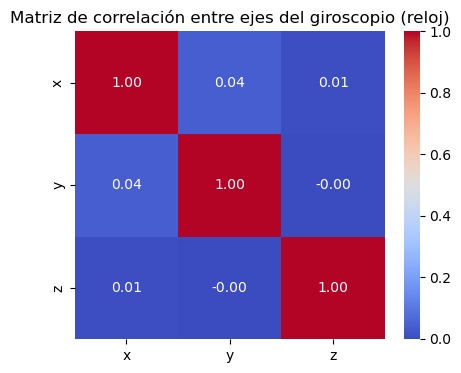

In [5]:
corr = df[['x','y','z']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre ejes del giroscopio (reloj)")
plt.show()


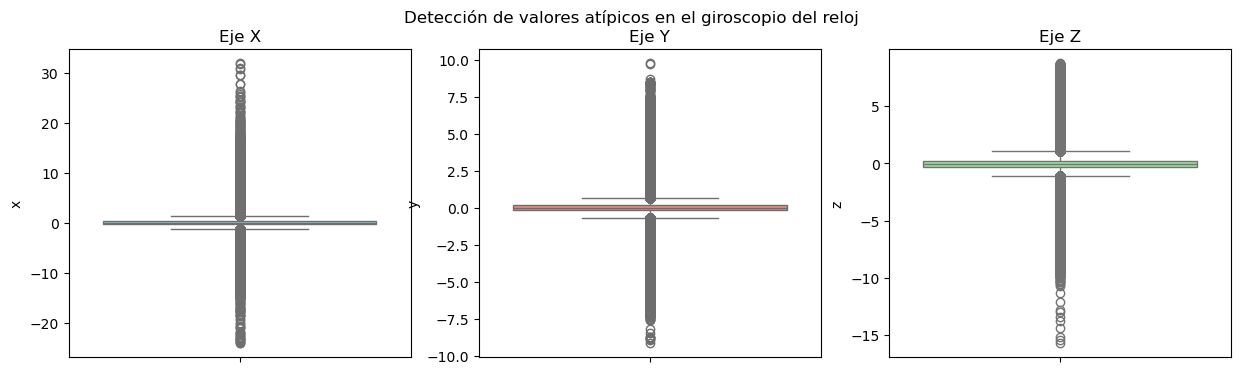

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=df['x'], ax=axes[0], color='skyblue')
axes[0].set_title('Eje X')

sns.boxplot(y=df['y'], ax=axes[1], color='salmon')
axes[1].set_title('Eje Y')

sns.boxplot(y=df['z'], ax=axes[2], color='lightgreen')
axes[2].set_title('Eje Z')

plt.suptitle('Detección de valores atípicos en el giroscopio del reloj')
plt.show()


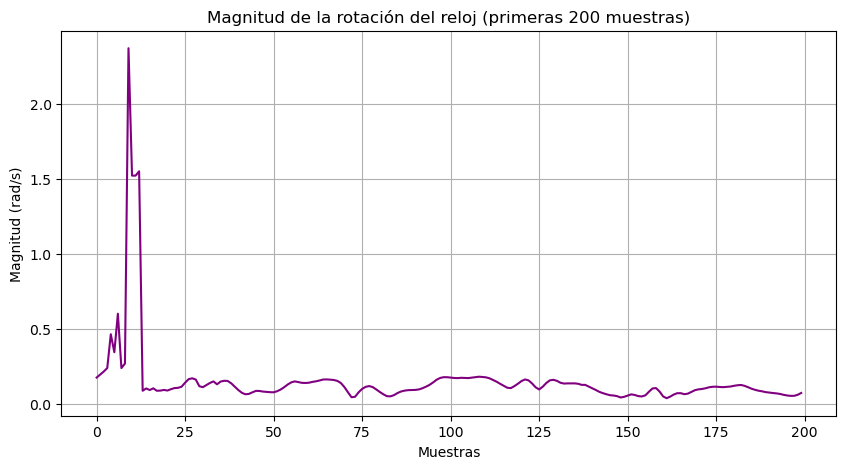

count    3.205431e+06
mean     1.058111e+00
std      1.145281e+00
min      3.240472e-04
25%      1.664914e-01
50%      7.342571e-01
75%      1.551927e+00
max      3.224140e+01
Name: magnitude, dtype: float64

In [7]:
import numpy as np

df['magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

plt.figure(figsize=(10,5))
plt.plot(df['magnitude'][:200], color='purple')
plt.title("Magnitud de la rotación del reloj (primeras 200 muestras)")
plt.xlabel("Muestras")
plt.ylabel("Magnitud (rad/s)")
plt.grid(True)
plt.show()

df['magnitude'].describe()


In [8]:
df.groupby('gt')[['x','y','z','magnitude']].mean()


,x,y,z,magnitude
gt,,,,
bike,0.011152,0.012941,-0.043385,0.683140
sit,0.003616,-0.001309,-0.004682,0.104679
stairsdown,0.032844,0.006627,0.021149,1.822102
stairsup,0.035845,0.017289,-0.059055,1.871002
stand,0.003339,-0.000081,-0.006788,0.203177
walk,0.020214,0.000614,-0.005317,1.341910
